dataset: https://creativecommons.org/publicdomain/zero/1.0/

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [37]:
df=pd.read_csv(r'C:\Users\majal\Downloads\archive (11)\marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [39]:
data=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [40]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [41]:
df=df.dropna()

In [42]:
print("Total categories in the feature Marital_Status:\n", df["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", df["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


In [43]:
df['Age'] = 2024-df['Year_Birth']  #age of user
df['Total_spent'] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
df['Relationship'] = df["Marital_Status"].replace({"Married":1, "Together":1, "Absurd":0, "Widow":0, "YOLO":0, "Divorced":0, "Single":0, "Alone":0})
df['Total_children'] = df['Kidhome']+df['Teenhome']
df['Family_size'] = df["Relationship"].replace({"No": 1, "Yes":2}).astype(int)+ df["Total_children"]
df["Education"]=df["Education"].replace({"Basic":0,"2n Cycle":0, "Graduation":1, "Master":2, "PhD":2})
df["Is_Parent"] = np.where(df["Total_children"] > 0, 1, 0)





C:\Users\majal\AppData\Local\Temp\ipykernel_29512\285154636.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Relationship'] = df["Marital_Status"].replace({"Married":1, "Together":1, "Absurd":0, "Widow":0, "YOLO":0, "Divorced":0, "Single":0, "Alone":0})
C:\Users\majal\AppData\Local\Temp\ipykernel_29512\285154636.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Education"]=df["Education"].replace({"Basic":0,"2n Cycle":0, "Graduation":1, "Master":2, "PhD":2})


In [44]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_spent,Relationship,Total_children,Family_size,Is_Parent
0,5524,1957,1,Single,58138.0,0,0,04-09-2012,58,635,...,0,3,11,1,67,1617,0,0,0,0
1,2174,1954,1,Single,46344.0,1,1,08-03-2014,38,11,...,0,3,11,0,70,27,0,2,2,1
2,4141,1965,1,Together,71613.0,0,0,21-08-2013,26,426,...,0,3,11,0,59,776,1,0,1,0
3,6182,1984,1,Together,26646.0,1,0,10-02-2014,26,11,...,0,3,11,0,40,53,1,1,2,1
4,5324,1981,2,Married,58293.0,1,0,19-01-2014,94,173,...,0,3,11,0,43,422,1,1,2,1


In [45]:
df=df.drop(['ID','Year_Birth', 'Marital_Status', 'Dt_Customer','Z_CostContact', 'Z_Revenue'], axis=1)

In [46]:
df.describe()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_spent,Relationship,Total_children,Family_size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1.267148,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,...,0.064079,0.013538,0.009477,0.150271,55.179603,607.075361,0.645307,0.947202,1.592509,0.714350
std,0.652084,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,...,0.244950,0.115588,0.096907,0.357417,11.985554,602.900476,0.478528,0.749062,0.905722,0.451825
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,28.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,47.000000,69.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,54.000000,396.500000,1.000000,1.000000,2.000000,1.000000
75%,2.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,0.000000,0.000000,0.000000,0.000000,65.000000,1048.000000,1.000000,1.000000,2.000000,1.000000
max,2.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,1.000000,1.000000,1.000000,1.000000,131.000000,2525.000000,1.000000,3.000000,4.000000,1.000000


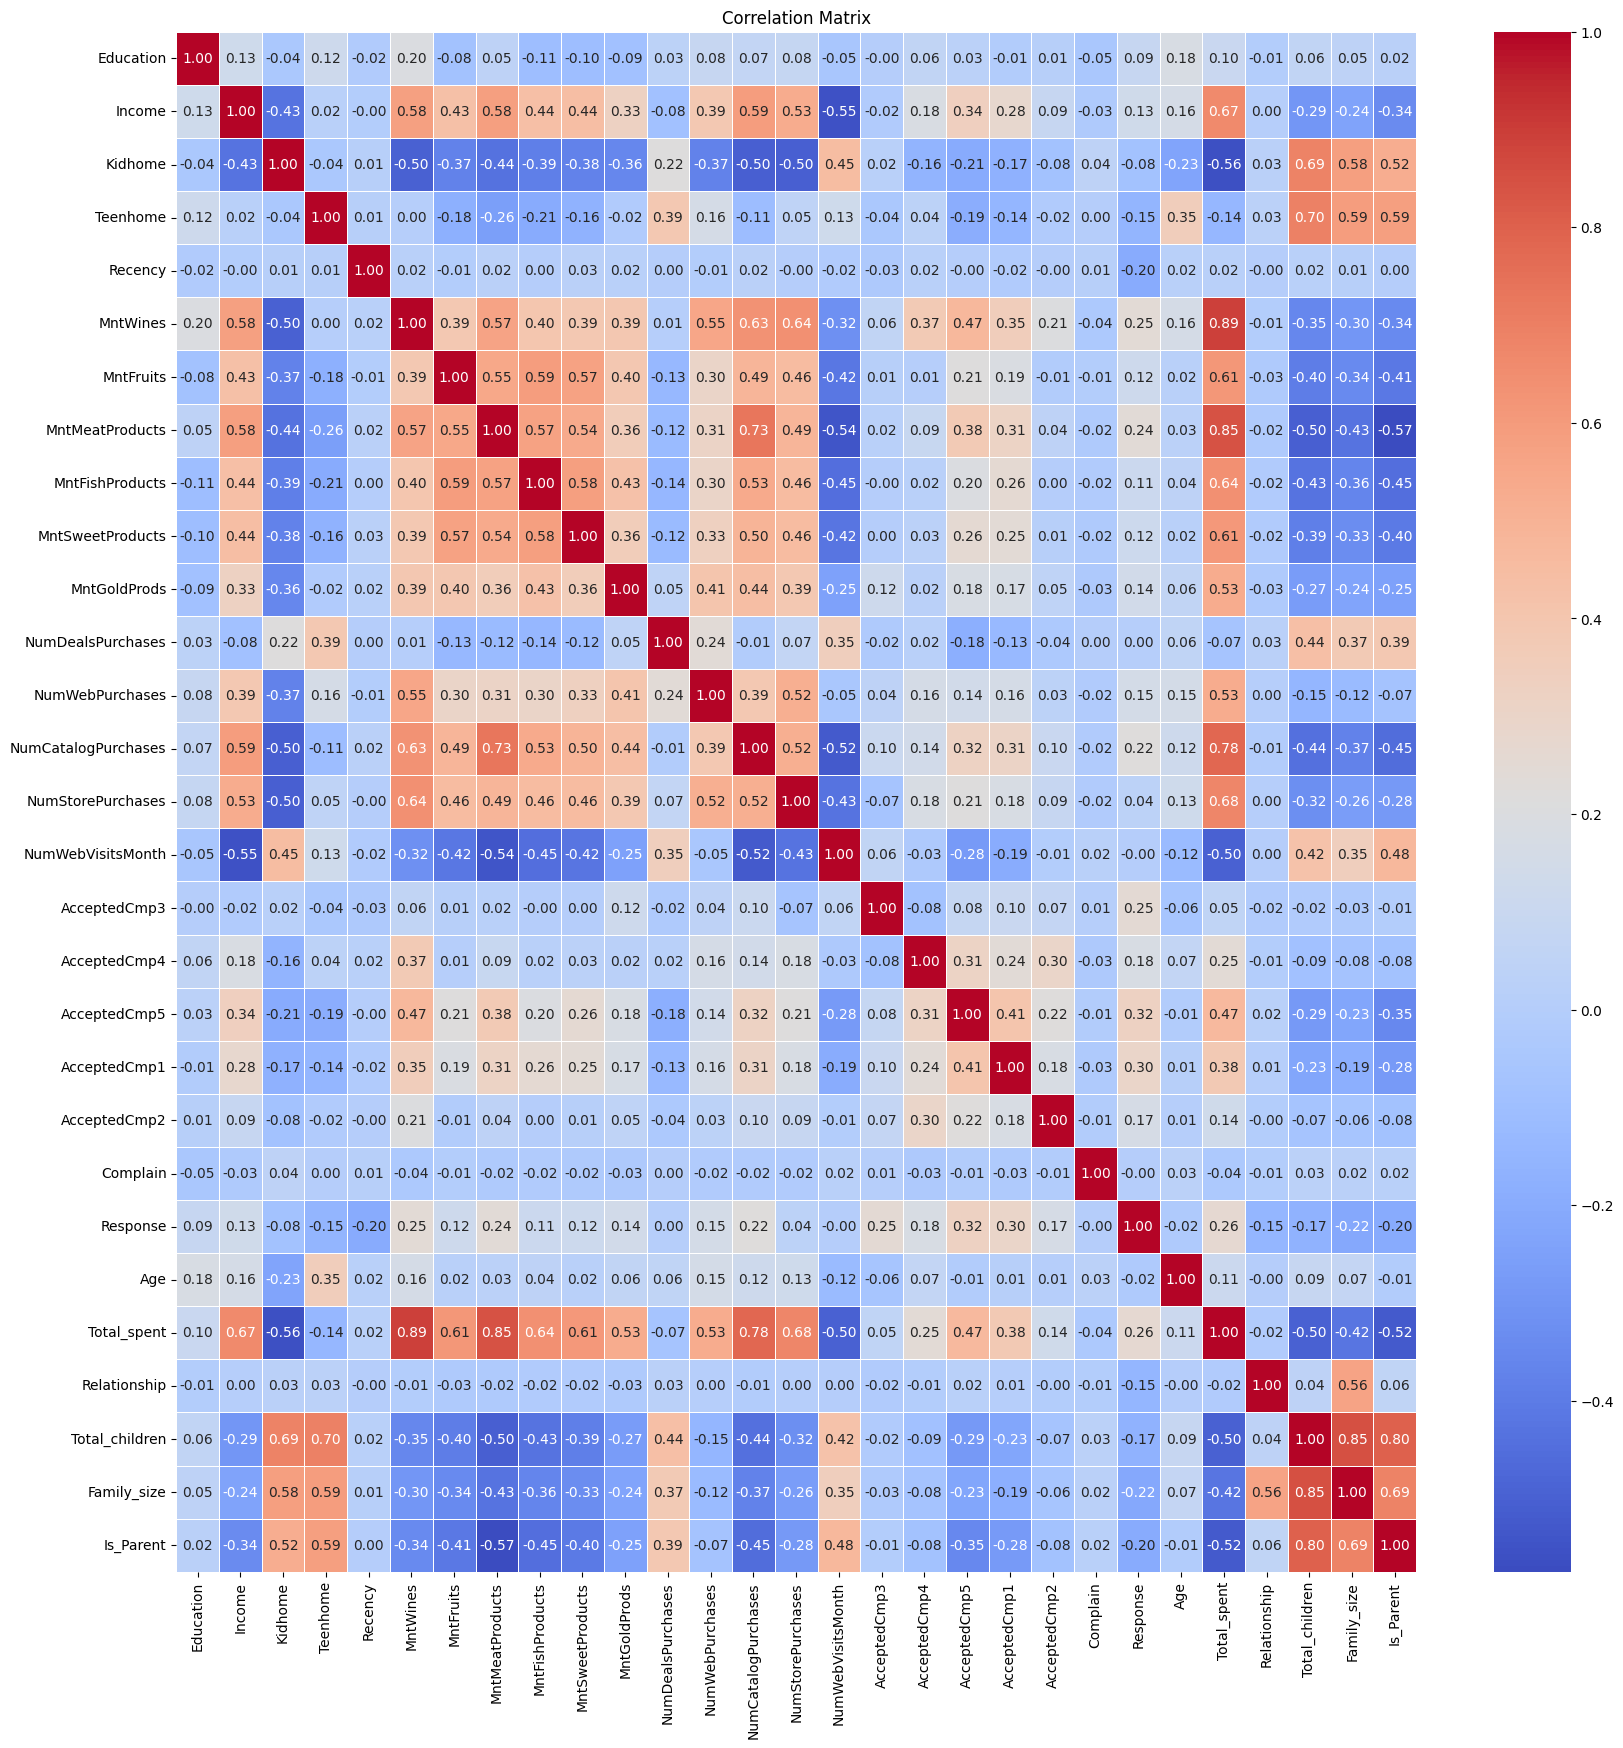

In [47]:
corr_matrix = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [48]:
columns = ['Age','Education', 'Income', 'Total_children', 'Recency', 'Total_spent', 'Relationship']


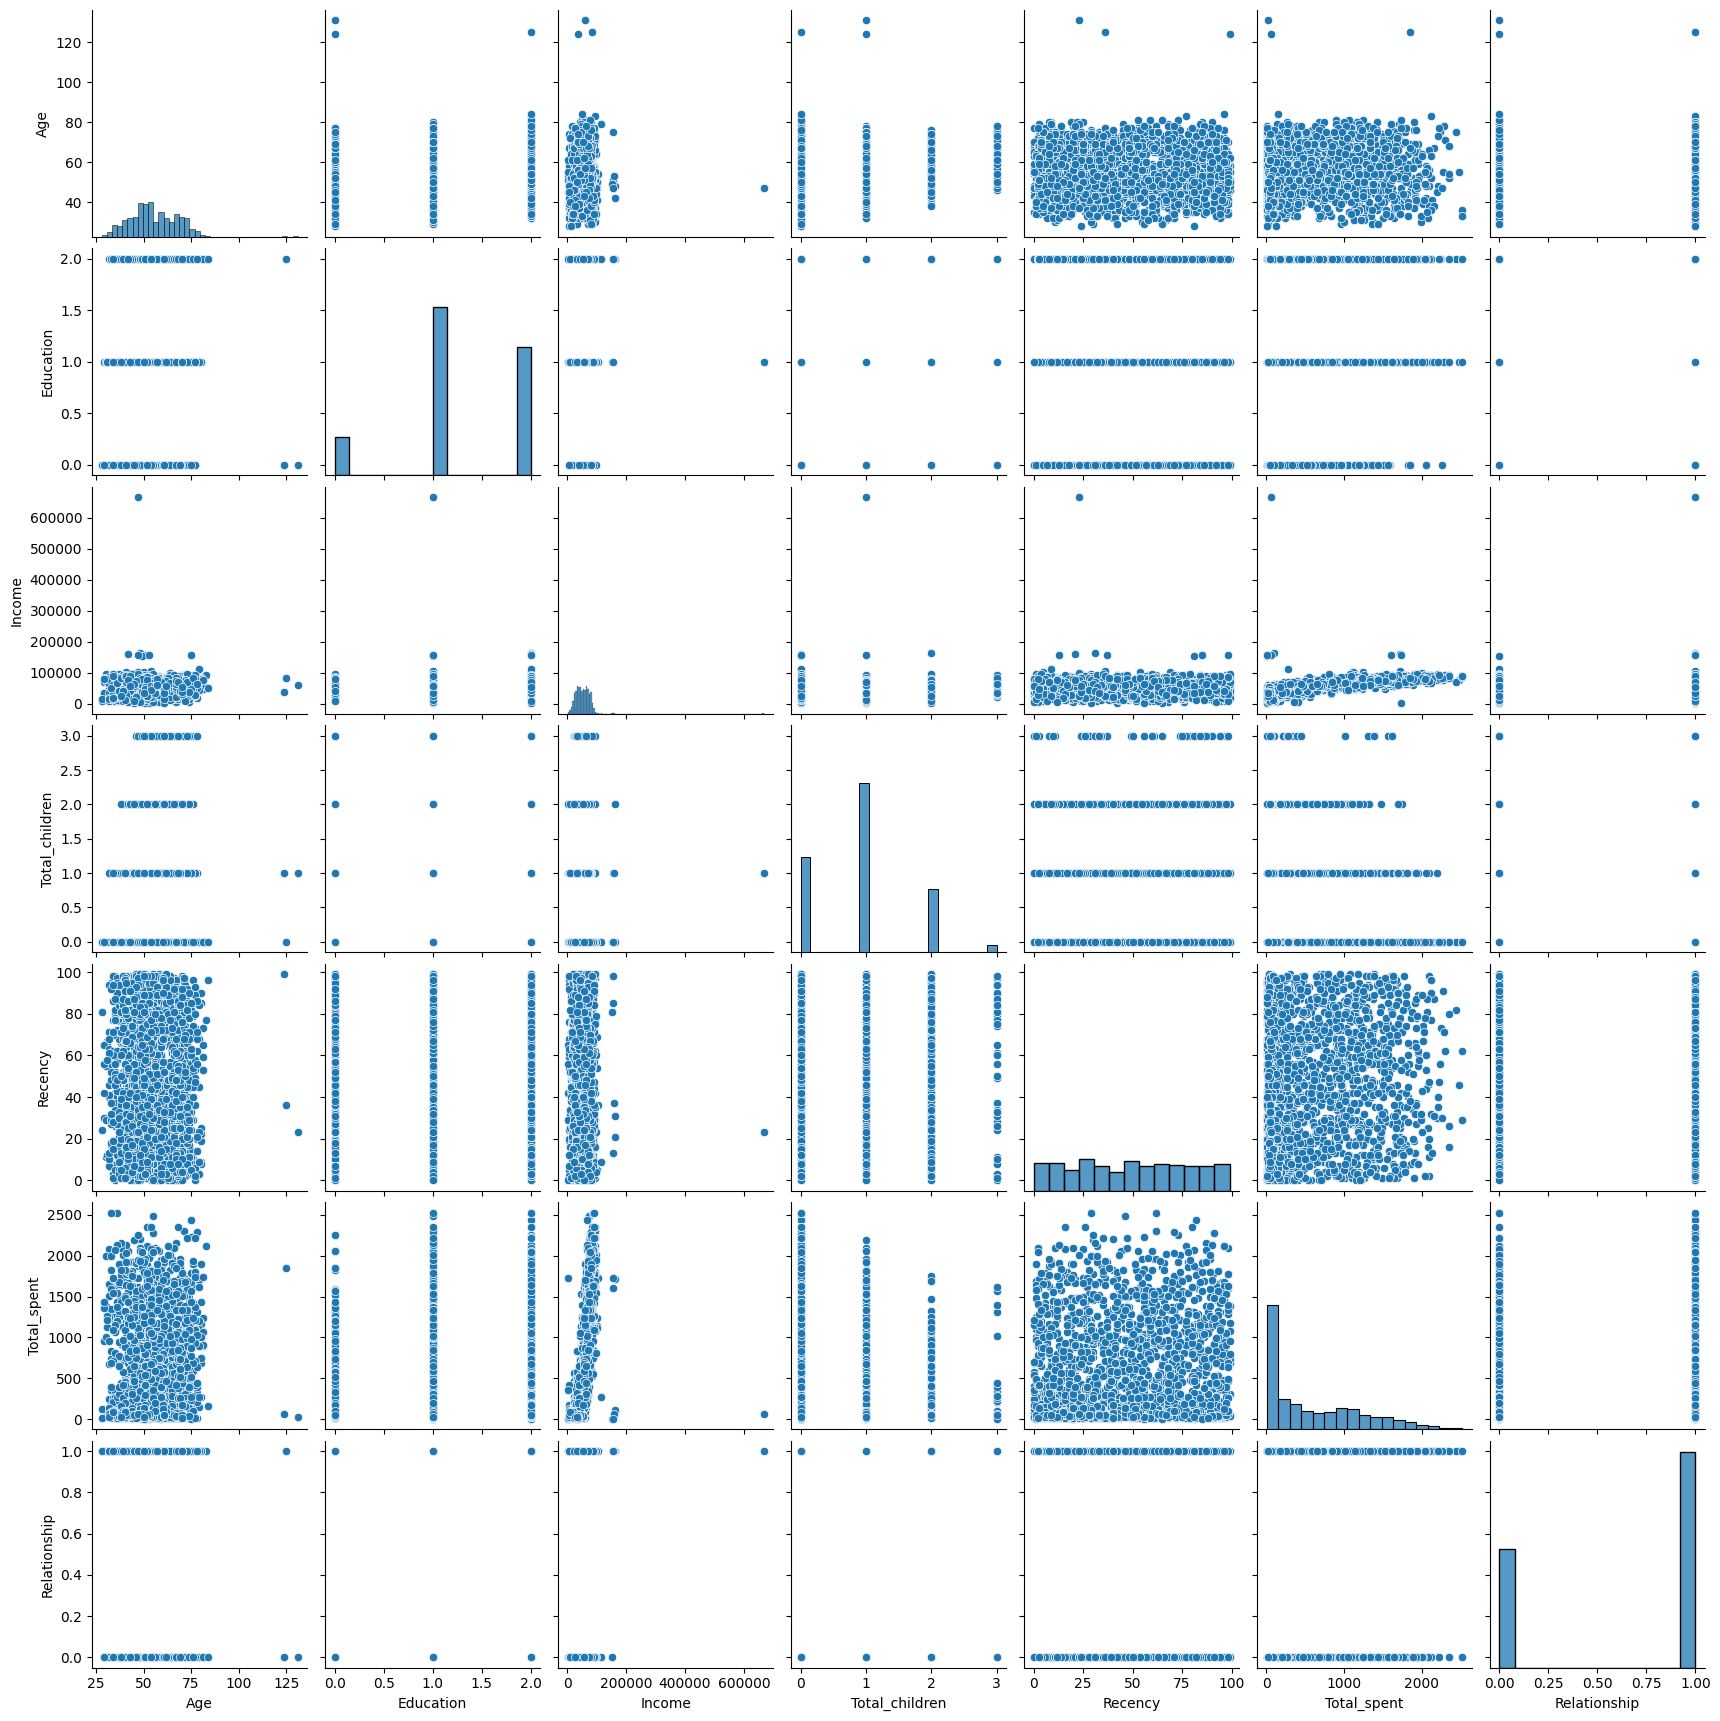

In [49]:
sns.pairplot(df[columns])
plt.show()

In [50]:
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]
print("The total number of data-points after removing the outliers:", len(df))

The total number of data-points after removing the outliers: 2212


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int64  
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   MntWines             2212 non-null   int64  
 6   MntFruits            2212 non-null   int64  
 7   MntMeatProducts      2212 non-null   int64  
 8   MntFishProducts      2212 non-null   int64  
 9   MntSweetProducts     2212 non-null   int64  
 10  MntGoldProds         2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   int64 

In [52]:
df_to_scale = df.copy()
columns_to_drop = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
df_to_scale = df_to_scale.drop(columns_to_drop, axis =1)
df_to_scale.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Total_spent,Relationship,Total_children,Family_size,Is_Parent
0,1,58138.0,0,0,58,635,88,546,172,88,...,8,10,4,7,67,1617,0,0,0,0
1,1,46344.0,1,1,38,11,1,6,2,1,...,1,1,2,5,70,27,0,2,2,1
2,1,71613.0,0,0,26,426,49,127,111,21,...,8,2,10,4,59,776,1,0,1,0
3,1,26646.0,1,0,26,11,4,20,10,3,...,2,0,4,6,40,53,1,1,2,1
4,2,58293.0,1,0,94,173,43,118,46,27,...,5,3,6,5,43,422,1,1,2,1


In [53]:
scaler = StandardScaler()
scaler.fit(df_to_scale)
df_scaled = pd.DataFrame(scaler.transform(df_to_scale),columns= df_to_scale.columns )


In [54]:
df_scaled.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Total_spent,Relationship,Total_children,Family_size,Is_Parent
0,-0.411675,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,1.426865,2.503607,-0.555814,0.692181,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.411675,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-1.126420,-0.571340,-1.171160,-0.132545,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.411675,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,1.426865,-0.229679,1.290224,-0.544908,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.411675,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.761665,-0.913000,-0.555814,0.279818,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,1.123949,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.332600,0.111982,0.059532,-0.132545,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


Dimension Reduction  - PCA method

In [55]:
pca = PCA(n_components = 3)
pca.fit(df_scaled)
df_PCA = pd.DataFrame(pca.transform(df_scaled), columns=(["col1","col2", "col3"]))
df_PCA.describe().T 

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-5.139550e-17,2.876570,-5.915030,-2.548037,-0.784932,2.418554,7.441147
col2,2212.0,-1.927331e-17,1.709068,-4.398456,-1.343423,-0.133306,1.243050,6.248193
col3,2212.0,-6.906270e-17,1.196077,-3.541433,-0.864028,-0.016680,0.824881,5.037593


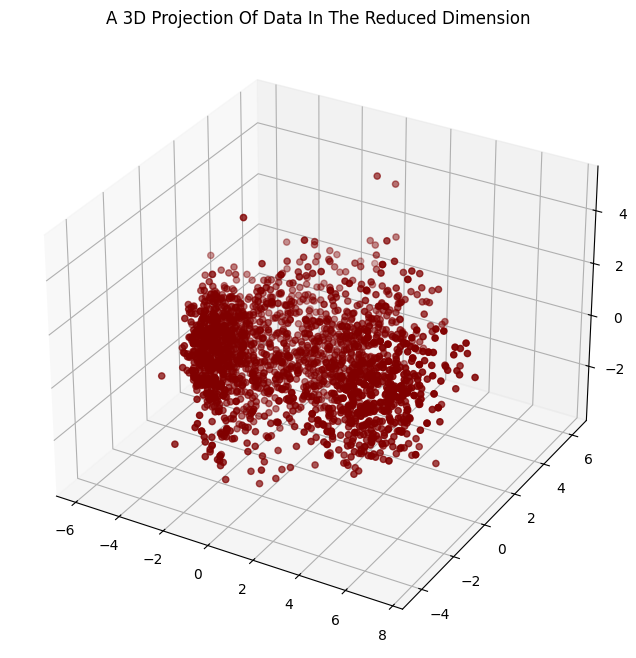

In [56]:
x =df_PCA["col1"]
y =df_PCA["col2"]
z =df_PCA["col3"]


fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

<h2> K-means </h2>

Clustering - elbow method

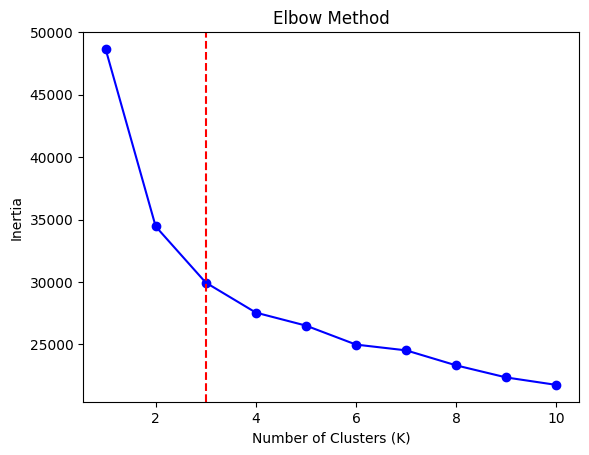

The optimal number of clusters is: 3


In [57]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 11) 

for K in K_range:
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)


kneedle = KneeLocator(K_range, inertia, curve="convex", direction="decreasing")

plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.axvline(kneedle.elbow, color='red', linestyle='--')
plt.show()

print(f"The optimal number of clusters is: {kneedle.elbow}")

In [58]:
#agglomerative Clustering model
from sklearn.cluster import AgglomerativeClustering

 
AC = AgglomerativeClustering(n_clusters=4)


yhat_AC = AC.fit_predict(df_PCA)
df_PCA["Clusters"] = yhat_AC


df["Clusters"]= yhat_AC


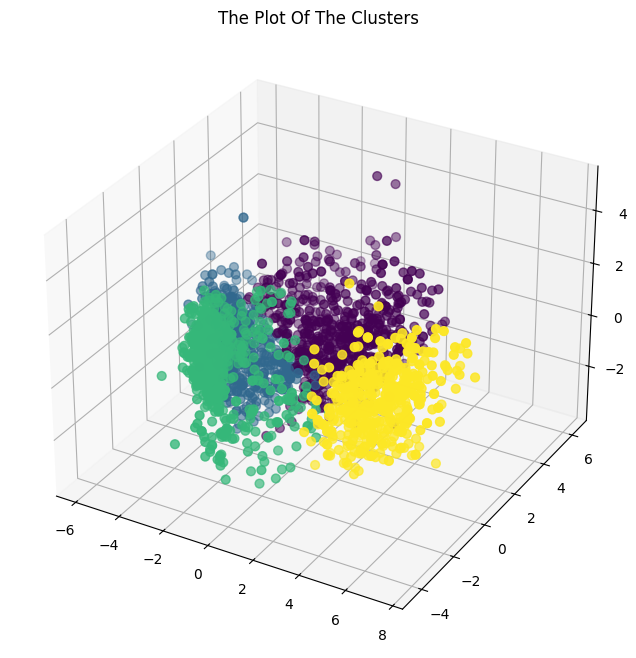

In [59]:
from matplotlib.colors import ListedColormap
from sklearn import metrics

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=df_PCA["Clusters"], marker='o')
ax.set_title("The Plot Of The Clusters")
plt.show()

Evaluation


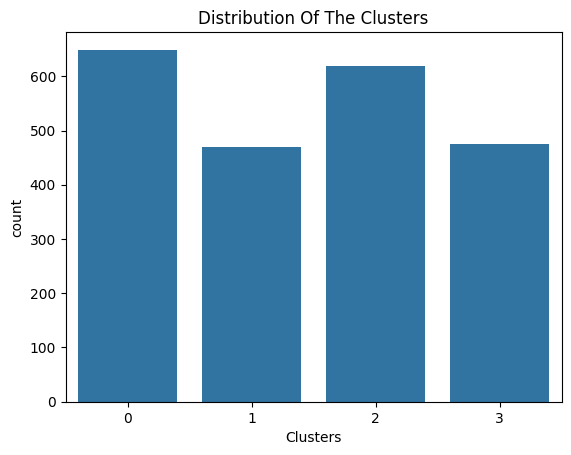

In [60]:

pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

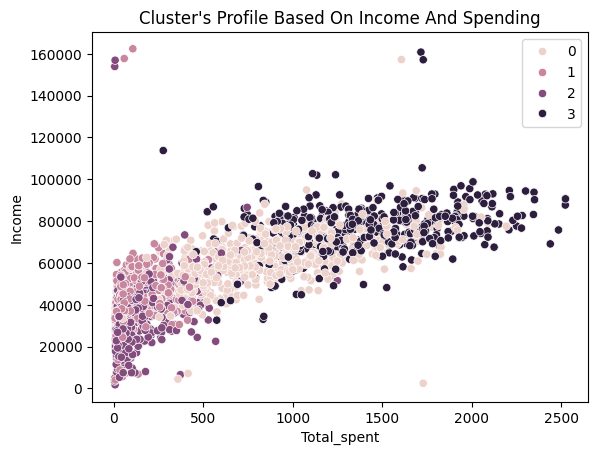

In [61]:
pl = sns.scatterplot(data = data,x=df["Total_spent"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

4 groups:
1. high spending & average income
2.  high spending & high income
3. low spending & low income
4. high spending & low income

c:\Users\majal\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 33.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\majal\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 68.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\majal\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 72.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\majal\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

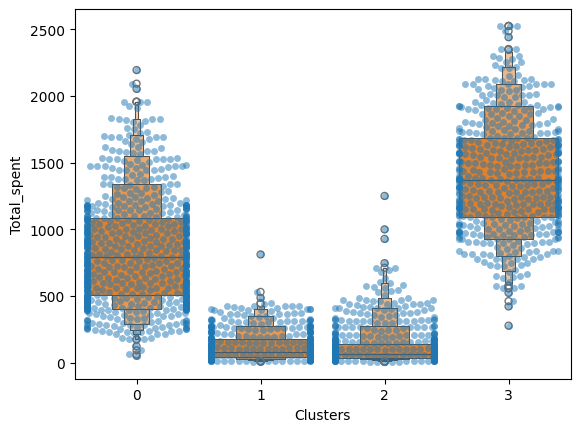

In [62]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Total_spent"], alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Total_spent"])
plt.show()

Cluster 1 has the largest group of customers, with cluster 0 close behind.

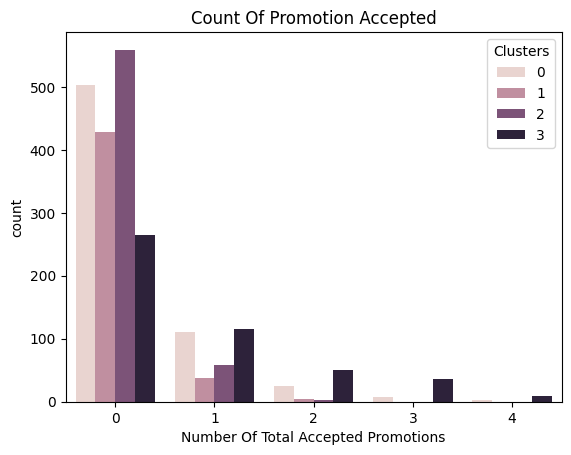

In [63]:
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

There has not been an overwhelming response to the campaigns so far. Very few participants overall. No one part take in all 5 of them.

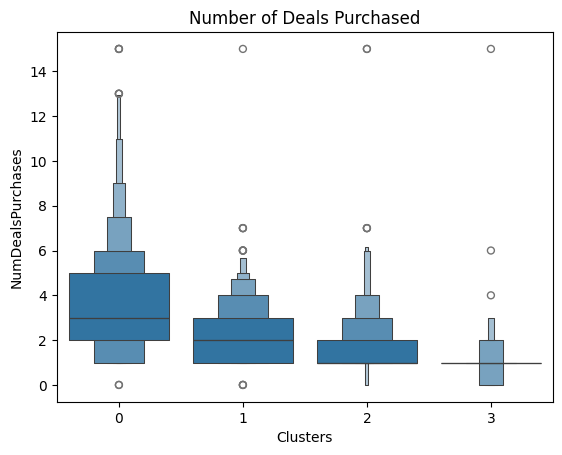

In [64]:
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"])
pl.set_title("Number of Deals Purchased")
plt.show()

The deals performed well, especially with customers in clusters 0 and 3. Customers in cluster 1 showed less interest in the offers, and cluster 2 didn’t respond strongly to any particular deal.

profiliing

<Figure size 640x480 with 0 Axes>

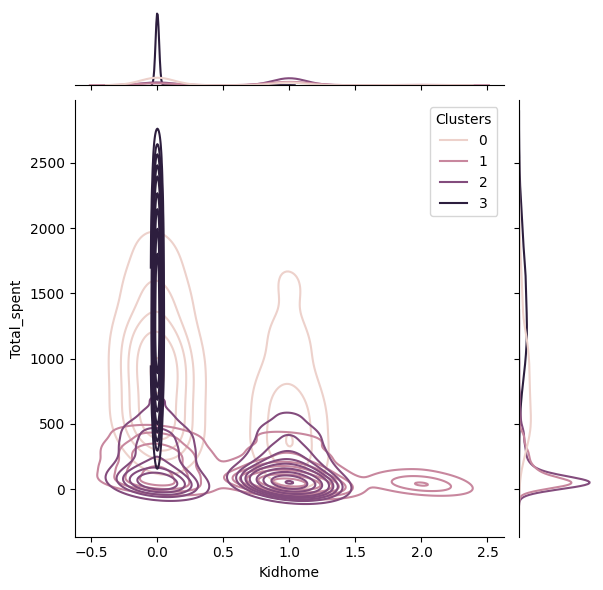

c:\Users\majal\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 640x480 with 0 Axes>

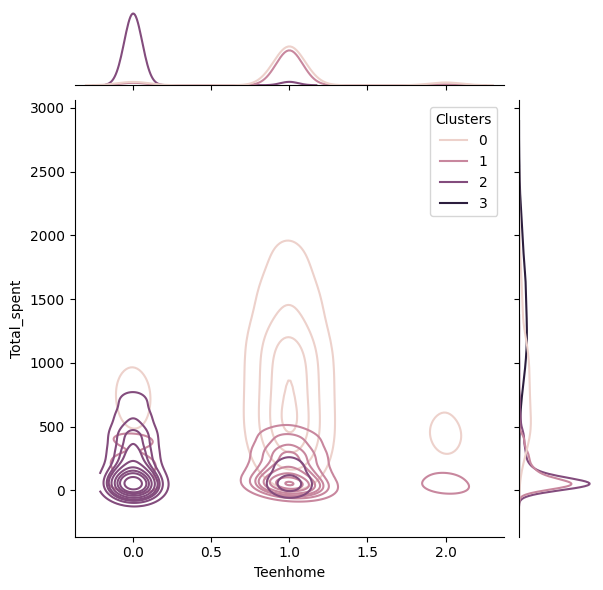

<Figure size 640x480 with 0 Axes>

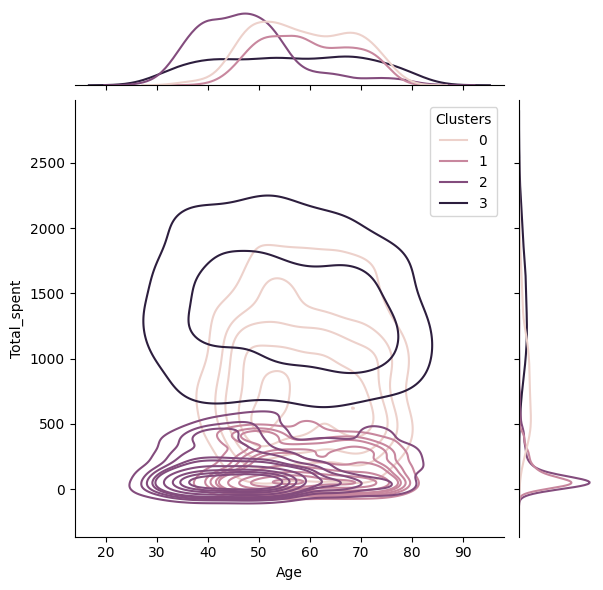

<Figure size 640x480 with 0 Axes>

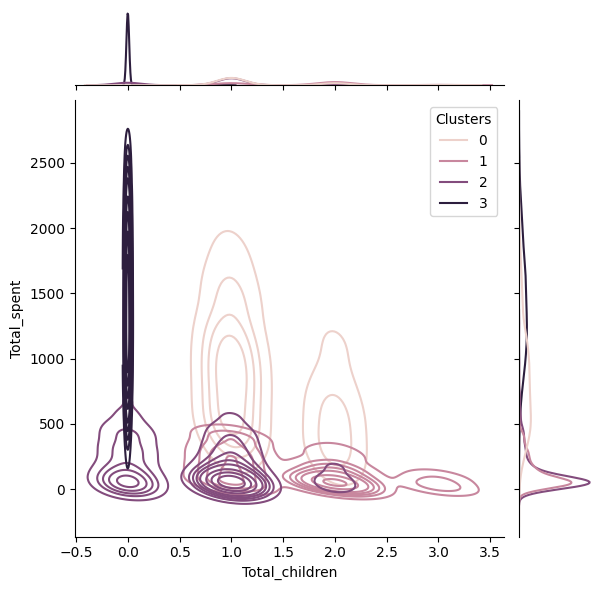

<Figure size 640x480 with 0 Axes>

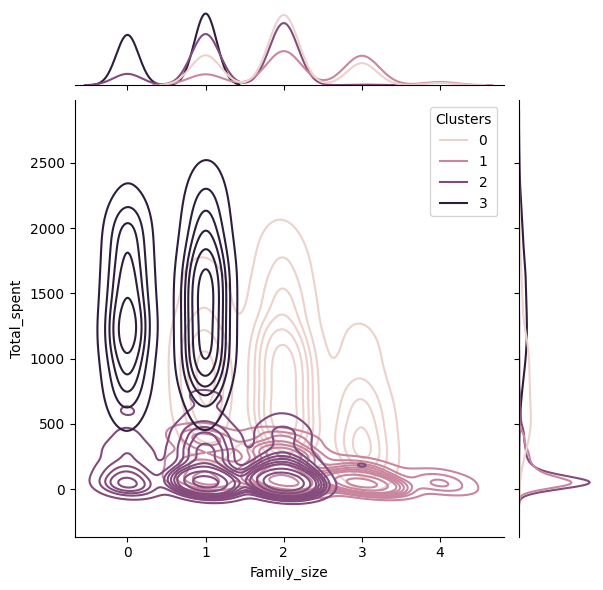

c:\Users\majal\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 640x480 with 0 Axes>

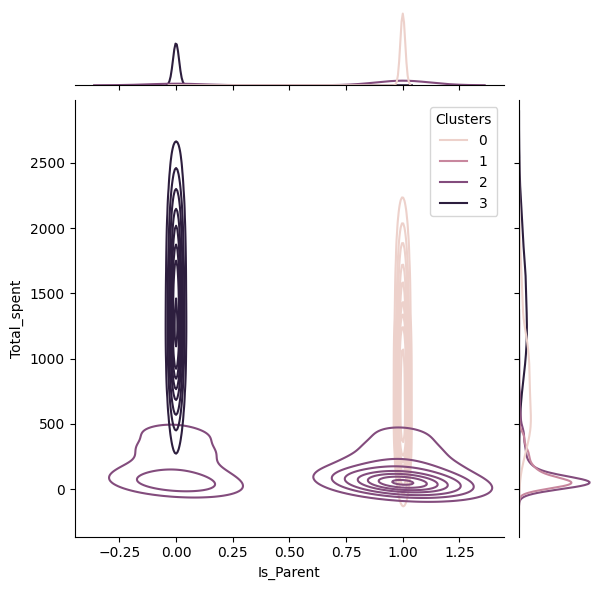

<Figure size 640x480 with 0 Axes>

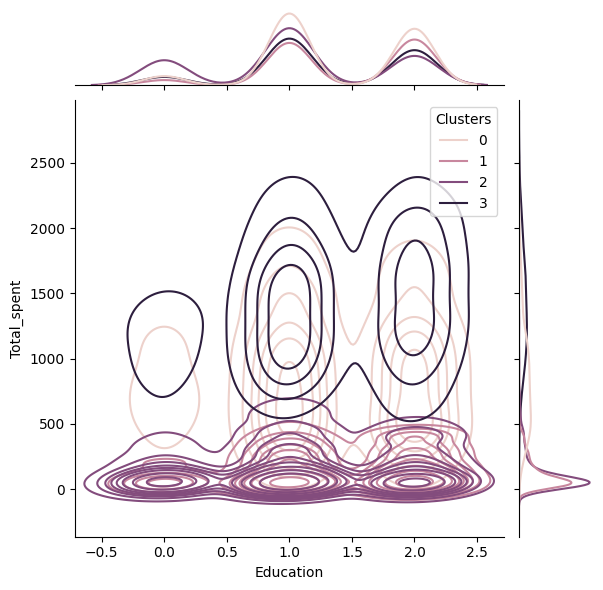

<Figure size 640x480 with 0 Axes>

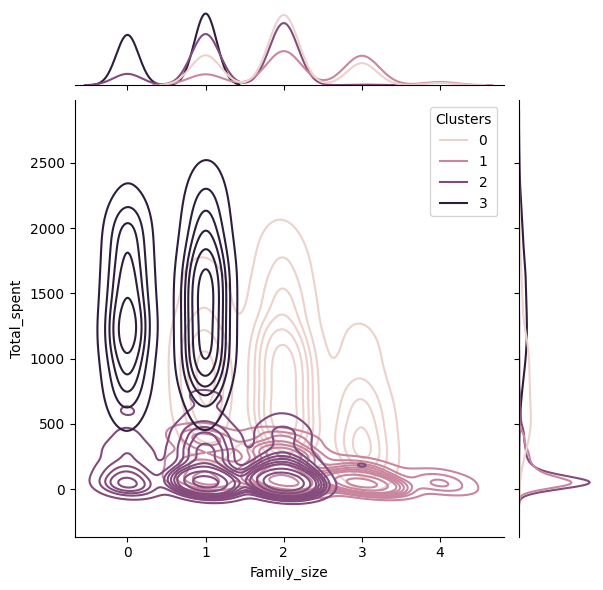

In [65]:
information = [ "Kidhome","Teenhome", "Age", "Total_children", "Family_size", "Is_Parent", "Education","Family_size"]

for i in information:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Total_spent"], hue =df["Clusters"], kind="kde")
    plt.show()

Cluster 0:
1. Prents.
2. Family size ranges from 2 to 4 members.
3. Many are single parents when we look at relationship status.
4. Most have teenagers.
5. Typically an older age group.

Cluster 1:
1. not a parent
2. Families typically have no more than two members.
3. Relationship status shows mostly couples, with fewer single individuals.
4. Higher income bracket.
5. Includes a wide range of ages.

Cluster 2:
1. Mostly parents.
2. Family size is generally up to 3 members.
3. Typically have one child.
4. Generally a younger age group.

Cluster 3:
1. All are parents.
2. Family size ranges from 2 to 5 members.
3. Most have at least one teenager.
4. Generally an older age group.
5. Belong to a lower-income bracket.

<h2>DBSCAN</h2>

In [66]:
from sklearn.cluster import DBSCAN
import plotly.express as px
cluster = DBSCAN(eps=0.2, min_samples=3)
cluster.fit(df)

cluster.labels_[:10]

unique_labels = set(cluster.labels_)
print("Number of clusters: ", len(unique_labels) - (1 if -1 in cluster.labels_ else 0))

Number of clusters:  6


In [67]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import numpy as np



In [68]:

db = DBSCAN(eps=0.5, min_samples=5)
db.fit(df_scaled)

labels = db.labels_

df_scaled["Cluster"] = labels


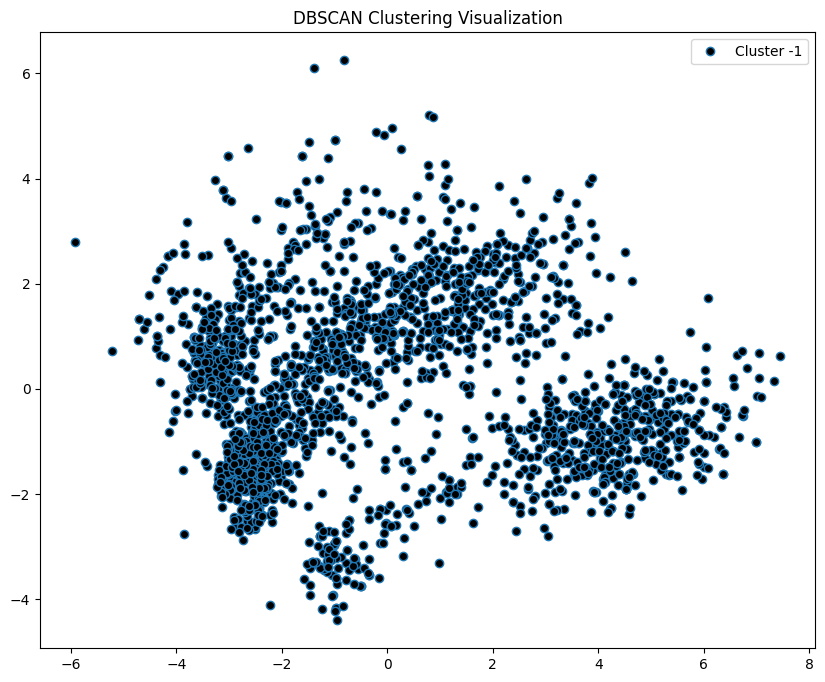

In [69]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

unique_labels = np.unique(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(10, 8))

for label, col in zip(unique_labels, colors):
    if label == -1:  
        col = [0, 0, 0, 1]
    class_member_mask = (labels == label)
    xy = df_pca[class_member_mask]

    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markersize=6, label=f'Cluster {label}')

plt.title('DBSCAN Clustering Visualization')
plt.legend()
plt.show()
